In [ ]:

!pip uninstall scipy
!pip install scipy==1.7.2

Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scipy-1.10.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-41284840.3.18.so
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/scipy/*
Proceed (Y/n)? Y
  Successfully uninstalled scipy-1.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 72.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


In [ ]:
!pip install easyesn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2950 sha256=cabe1ef8f4b4d5af1a52a6c1517106b90a4d6182b4d7e89f3656c278663b13d1
  Stored in directory: /root/.cache/pip/wheels/c8/9c/85/72901eb50bc4bc6e3b2629378d172384ea3dfd19759c77fd2c
Successfully built sklearn


In [ ]:
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import warnings
from easyesn import ClassificationESN
from easyesn import OneHotEncoder
from easyesn.optimizers import GridSearchOptimizer
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
from sklearn.utils import resample,shuffle
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,f1_score,precision_score,recall_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import warnings
from easyesn import ClassificationESN
from easyesn import OneHotEncoder
from easyesn.optimizers import GridSearchOptimizer
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.datasets import make_imbalance



In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/parkinsons (8) (1).data")
df.drop('name', axis=1, inplace=True)
label = df.status
features = df.drop('status', axis=1)
df = pd.concat([features, label], axis=1)

In [ ]:
X_root = df.drop('status', axis=1)
X_root = np.array(X_root)
y_root = df.status.values
y_root = np.array(y_root)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from easyesn import RegressionESN
from sklearn.model_selection import cross_val_score
from easyesn import ClassificationESN
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:
X_train_root , X_test_root , y_train_root , y_test_root = train_test_split ( X_root ,y_root , test_size=0.3)
X_train_final = X_train_root[:, [ 0,18, 19, 21]]
X_test_final = X_test_root[:,  [0 ,18, 19, 21]]

In [ ]:
oh = OneHotEncoder()
y_test_root_help = oh.fit_transform(y_test_root)
y_train_root_help = oh.fit_transform(y_train_root)


# Train the ESN model on the full training data
esn = ClassificationESN(n_input=1, n_reservoir=100, n_classes=2, leakingRate=0.01, spectralRadius=0.9, regressionParameters=[1e-2], solver='pinv')
esn.fit(X_train_final, y_train_root_help)

# Make predictions on the test data
y_pred_test = esn.predict(X_test_final)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test_root_help, y_pred_test)
print("Accuracy:", accuracy)

from sklearn.metrics import recall_score, precision_score

# Calculate recall
recall = recall_score(y_test_root_help, y_pred_test, average='macro')

# Calculate precision
precision = precision_score(y_test_root_help, y_pred_test, average='macro')

print("Recall:", recall)
print("Precision:", precision)

print("--------------------------------------------------------------------")
print("--------------------------------------------------------------------")

Confusion Matrix
[[12  6]
 [ 4 37]]
Classification Report
              precision    recall  f1-score   support

           0      0.750     0.667     0.706        18
           1      0.860     0.902     0.881        41

    accuracy                          0.831        59
   macro avg      0.805     0.785     0.793        59
weighted avg      0.827     0.831     0.828        59

         count      mean       std       min       25%       50%       75%  \
 grad_1    2.0  0.382114  0.402418  0.097561  0.239837  0.382114  0.524390   
 grad_2    2.0  0.617886  0.402418  0.333333  0.475610  0.617886  0.760163   

              max  
 grad_1  0.666667  
 grad_2  0.902439  


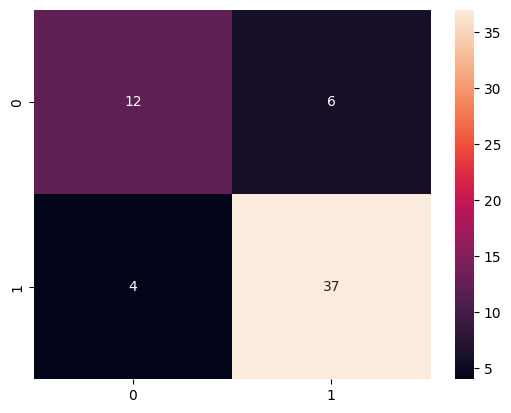

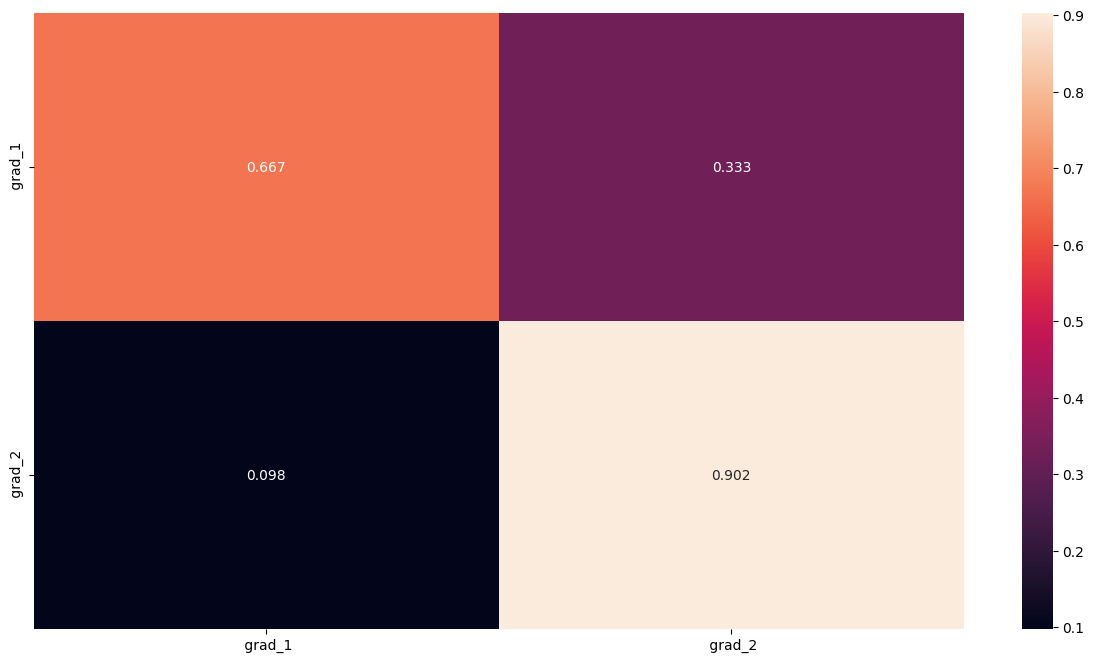

In [ ]:
labels = [' grad_1', ' grad_2']
# Y_pred = esn.predict(X_test)
y_pred = np.argmax(y_pred_test, axis=1)
y_test = np.argmax(y_test_root_help, axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('Classification Report')
print(classification_report(y_test, y_pred, digits=3))

cf_matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)
cnf_matrix_norm = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
print(df_cm.describe().T)
plt.figure(figsize=(15, 8))
sns.heatmap(df_cm, annot=True, fmt='.3f')
plt.show()

In [ ]:
for i in range(0,len(y_pred_test)):
  print(i)
  print("predict:",y_pred_test[i])
  print("real:",y_test_root_help[i])
  print("--------")
  print("--------")

0
predict: [1. 0.]
real: [1. 0.]
--------
--------
1
predict: [0. 1.]
real: [0. 1.]
--------
--------
2
predict: [0. 1.]
real: [0. 1.]
--------
--------
3
predict: [0. 1.]
real: [0. 1.]
--------
--------
4
predict: [0. 1.]
real: [1. 0.]
--------
--------
5
predict: [0. 1.]
real: [1. 0.]
--------
--------
6
predict: [0. 1.]
real: [0. 1.]
--------
--------
7
predict: [0. 1.]
real: [0. 1.]
--------
--------
8
predict: [1. 0.]
real: [1. 0.]
--------
--------
9
predict: [0. 1.]
real: [1. 0.]
--------
--------
10
predict: [1. 0.]
real: [1. 0.]
--------
--------
11
predict: [1. 0.]
real: [1. 0.]
--------
--------
12
predict: [0. 1.]
real: [0. 1.]
--------
--------
13
predict: [1. 0.]
real: [0. 1.]
--------
--------
14
predict: [0. 1.]
real: [0. 1.]
--------
--------
15
predict: [0. 1.]
real: [1. 0.]
--------
--------
16
predict: [1. 0.]
real: [1. 0.]
--------
--------
17
predict: [1. 0.]
real: [1. 0.]
--------
--------
18
predict: [1. 0.]
real: [1. 0.]
--------
--------
19
predict: [0. 1.]
re

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier(max_depth= 20, max_features = 'auto', n_estimators= 200)

# Train the classifier on the full training data
rf_classifier.fit(X_train_final, y_train_root)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_final)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test_root, y_pred)
print("Random Forest Accuracy:", accuracy)

from sklearn.metrics import recall_score, precision_score

# Calculate recall
recall = recall_score(y_test_root, y_pred)

# Calculate precision
precision = precision_score(y_test_root, y_pred)

print("Recall:", recall)
print("Precision:", precision)

from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
confusion = confusion_matrix(y_test_root, y_pred)

print("Confusion Matrix:")
print(confusion)


Random Forest Accuracy: 0.8813559322033898
Recall: 0.9512195121951219
Precision: 0.8863636363636364
Confusion Matrix:
[[13  5]
 [ 2 39]]


Confusion Matrix
[[13  5]
 [ 2 39]]
Classification Report
              precision    recall  f1-score   support

           0      0.867     0.722     0.788        18
           1      0.886     0.951     0.918        41

    accuracy                          0.881        59
   macro avg      0.877     0.837     0.853        59
weighted avg      0.880     0.881     0.878        59

         count      mean       std       min       25%       50%       75%  \
 grad_1    2.0  0.385501  0.476195  0.048780  0.217141  0.385501  0.553862   
 grad_2    2.0  0.614499  0.476195  0.277778  0.446138  0.614499  0.782859   

              max  
 grad_1  0.722222  
 grad_2  0.951220  


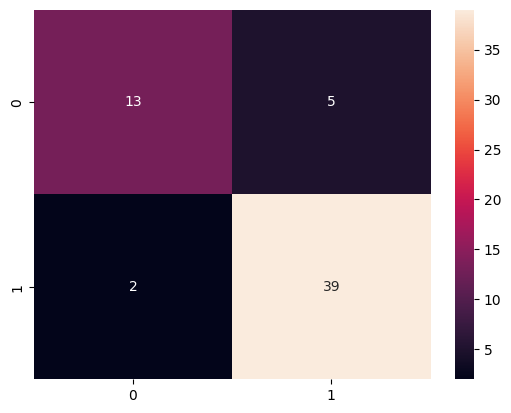

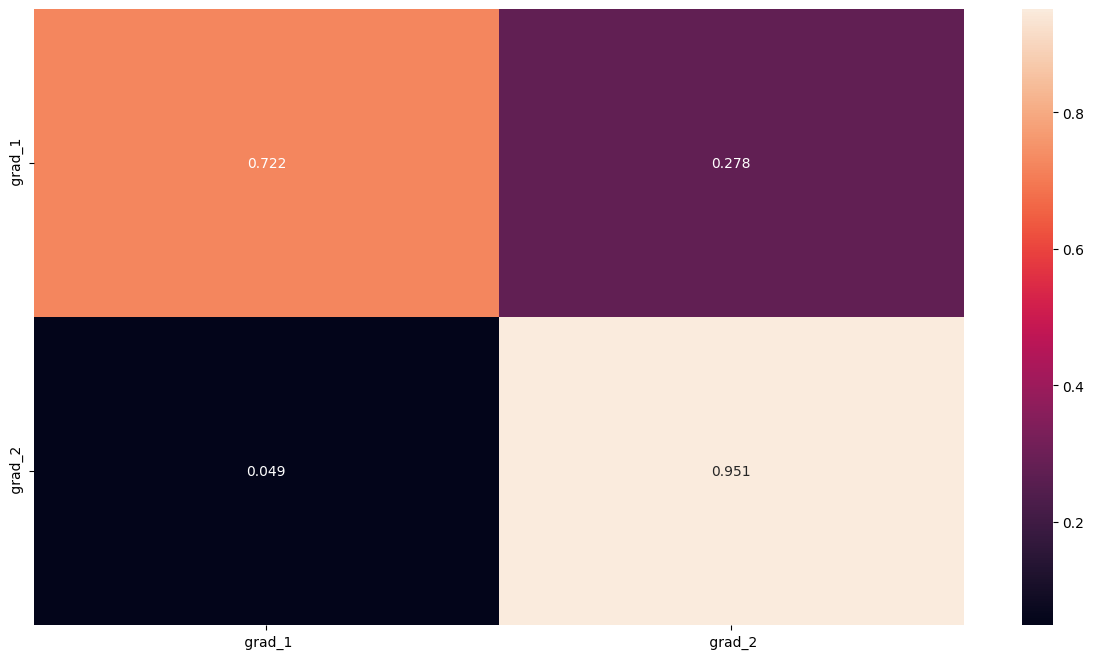

In [ ]:
labels = [' grad_1', ' grad_2']

print('Confusion Matrix')
print(confusion_matrix(y_test_root, y_pred))
print('Classification Report')
print(classification_report(y_test_root, y_pred, digits=3))

cf_matrix=confusion_matrix(y_test_root, y_pred)
sns.heatmap(cf_matrix, annot=True)
cnf_matrix_norm = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
print(df_cm.describe().T)
plt.figure(figsize=(15, 8))
sns.heatmap(df_cm, annot=True, fmt='.3f')
plt.show()

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Create a k-NN classifier object
knn_classifier = KNeighborsClassifier(n_neighbors = 3, p = 1, weights = 'distance')

# Train the classifier on the full training data
knn_classifier.fit(X_train_final, y_train_root)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test_final)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test_root, y_pred)
print("k-NN Accuracy:", accuracy)


from sklearn.metrics import recall_score, precision_score

# Calculate recall
recall = recall_score(y_test_root, y_pred)

# Calculate precision
precision = precision_score(y_test_root, y_pred)

print("Recall:", recall)
print("Precision:", precision)

from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
confusion = confusion_matrix(y_test_root, y_pred)

print("Confusion Matrix:")
print(confusion)


k-NN Accuracy: 0.8983050847457628
Recall: 0.926829268292683
Precision: 0.926829268292683
Confusion Matrix:
[[15  3]
 [ 3 38]]


Confusion Matrix
[[15  3]
 [ 3 38]]
Classification Report
              precision    recall  f1-score   support

           0      0.833     0.833     0.833        18
           1      0.927     0.927     0.927        41

    accuracy                          0.898        59
   macro avg      0.880     0.880     0.880        59
weighted avg      0.898     0.898     0.898        59

         count      mean       std       min       25%       50%       75%  \
 grad_1    2.0  0.453252  0.537516  0.073171  0.263211  0.453252  0.643293   
 grad_2    2.0  0.546748  0.537516  0.166667  0.356707  0.546748  0.736789   

              max  
 grad_1  0.833333  
 grad_2  0.926829  


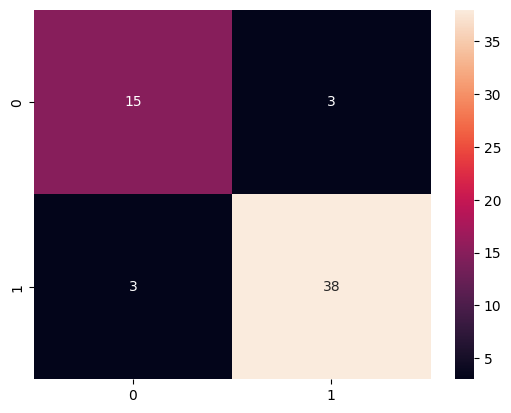

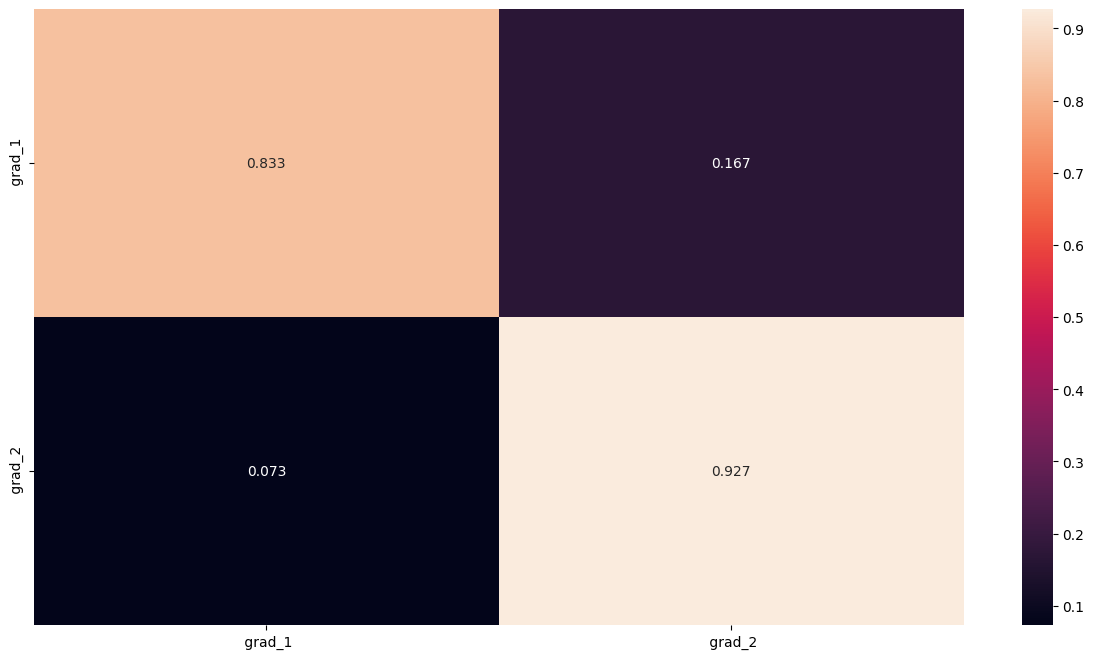

In [ ]:
labels = [' grad_1', ' grad_2']

print('Confusion Matrix')
print(confusion_matrix(y_test_root, y_pred))
print('Classification Report')
print(classification_report(y_test_root, y_pred, digits=3))

cf_matrix=confusion_matrix(y_test_root, y_pred)
sns.heatmap(cf_matrix, annot=True)
cnf_matrix_norm = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
print(df_cm.describe().T)
plt.figure(figsize=(15, 8))
sns.heatmap(df_cm, annot=True, fmt='.3f')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Create an SVM classifier object
svm_classifier = SVC(kernel='linear',C=1, gamma= 'scale' )

# Train the classifier on the full training data
svm_classifier.fit(X_train_final, y_train_root)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test_final)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test_root, y_pred)
print("SVM Accuracy:", accuracy)


from sklearn.metrics import recall_score, precision_score

# Calculate recall
recall = recall_score(y_test_root, y_pred)

# Calculate precision
precision = precision_score(y_test_root, y_pred)

print("Recall:", recall)
print("Precision:", precision)

from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
confusion = confusion_matrix(y_test_root, y_pred)

print("Confusion Matrix:")
print(confusion)



SVM Accuracy: 0.8305084745762712
Recall: 0.975609756097561
Precision: 0.8163265306122449
Confusion Matrix:
[[ 9  9]
 [ 1 40]]


Confusion Matrix
[[ 9  9]
 [ 1 40]]
Classification Report
              precision    recall  f1-score   support

           0      0.900     0.500     0.643        18
           1      0.816     0.976     0.889        41

    accuracy                          0.831        59
   macro avg      0.858     0.738     0.766        59
weighted avg      0.842     0.831     0.814        59

         count      mean       std      min       25%       50%       75%  \
 grad_1    2.0  0.262195  0.336307  0.02439  0.143293  0.262195  0.381098   
 grad_2    2.0  0.737805  0.336307  0.50000  0.618902  0.737805  0.856707   

             max  
 grad_1  0.50000  
 grad_2  0.97561  


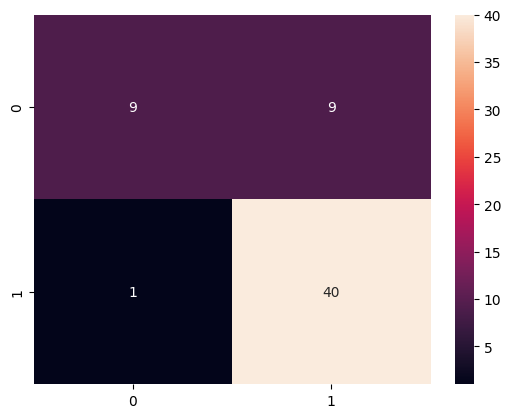

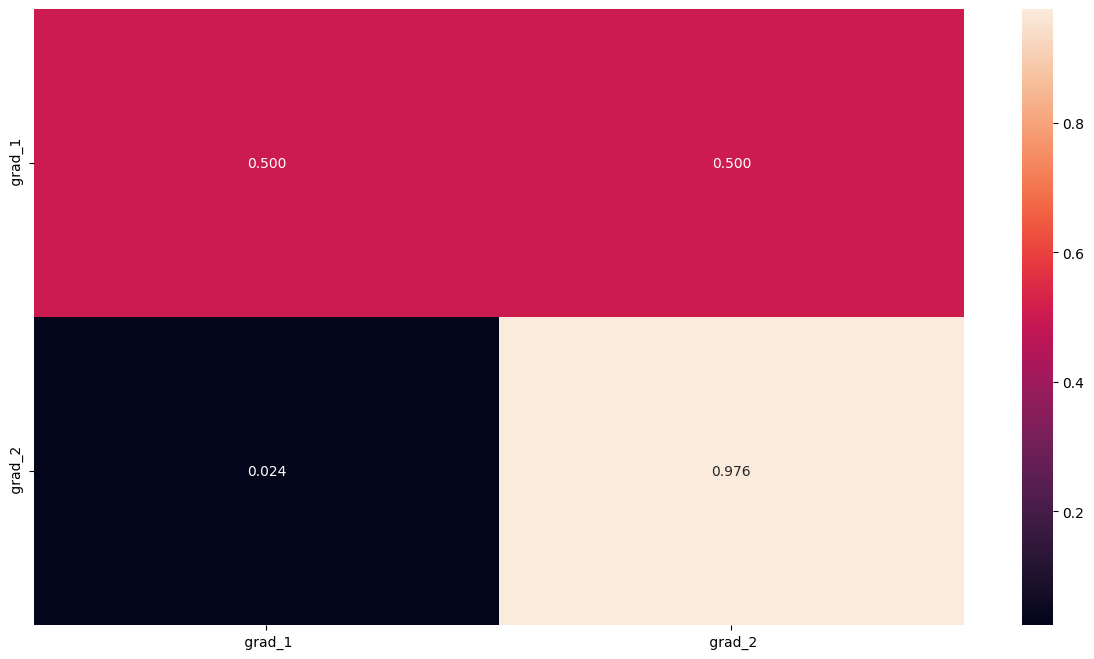

In [ ]:
labels = [' grad_1', ' grad_2']

print('Confusion Matrix')
print(confusion_matrix(y_test_root, y_pred))
print('Classification Report')
print(classification_report(y_test_root, y_pred, digits=3))

cf_matrix=confusion_matrix(y_test_root, y_pred)
sns.heatmap(cf_matrix, annot=True)
cnf_matrix_norm = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
print(df_cm.describe().T)
plt.figure(figsize=(15, 8))
sns.heatmap(df_cm, annot=True, fmt='.3f')
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Create an XGBoost classifier object
xgb_classifier = XGBClassifier(colsample_bytree=0.8, gamma= 0,learning_rate= 0.3,max_depth=3,min_child_weight= 3,subsample= 1.0)

# Train the classifier on the full training data
xgb_classifier.fit(X_train_final, y_train_root)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test_final)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test_root, y_pred)
print("XGBoost Accuracy:", accuracy)

from sklearn.metrics import recall_score, precision_score

# Calculate recall
recall = recall_score(y_test_root, y_pred)

# Calculate precision
precision = precision_score(y_test_root, y_pred)

print("Recall:", recall)
print("Precision:", precision)

from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
confusion = confusion_matrix(y_test_root, y_pred)

print("Confusion Matrix:")
print(confusion)


XGBoost Accuracy: 0.8983050847457628
Recall: 0.9512195121951219
Precision: 0.9069767441860465
Confusion Matrix:
[[14  4]
 [ 2 39]]


Confusion Matrix
[[14  4]
 [ 2 39]]
Classification Report
              precision    recall  f1-score   support

           0      0.875     0.778     0.824        18
           1      0.907     0.951     0.929        41

    accuracy                          0.898        59
   macro avg      0.891     0.864     0.876        59
weighted avg      0.897     0.898     0.897        59

         count      mean       std       min       25%       50%       75%  \
 grad_1    2.0  0.413279  0.515479  0.048780  0.231030  0.413279  0.595528   
 grad_2    2.0  0.586721  0.515479  0.222222  0.404472  0.586721  0.768970   

              max  
 grad_1  0.777778  
 grad_2  0.951220  


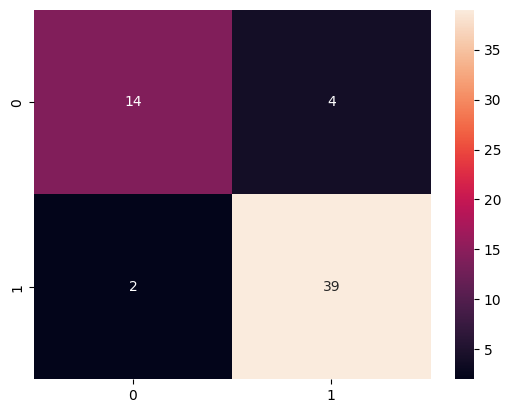

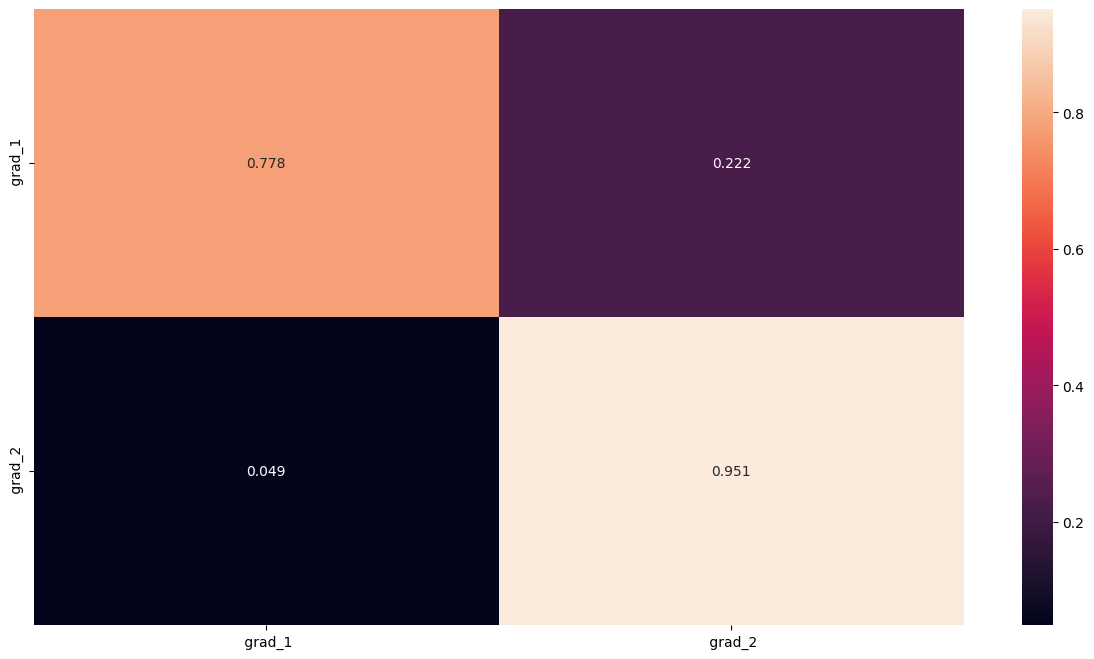

In [ ]:
labels = [' grad_1', ' grad_2']

print('Confusion Matrix')
print(confusion_matrix(y_test_root, y_pred))
print('Classification Report')
print(classification_report(y_test_root, y_pred, digits=3))

cf_matrix=confusion_matrix(y_test_root, y_pred)
sns.heatmap(cf_matrix, annot=True)
cnf_matrix_norm = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
print(df_cm.describe().T)
plt.figure(figsize=(15, 8))
sns.heatmap(df_cm, annot=True, fmt='.3f')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Create a Logistic Regression classifier object
logistic_regression = LogisticRegression(C= 0.1, penalty='l2', solver= 'lbfgs')


# Train the classifier on the full training data
logistic_regression.fit(X_train_final, y_train_root)

# Make predictions on the test data
y_pred = logistic_regression.predict(X_test_final)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test_root, y_pred)
print("Logistic Regression Accuracy:", accuracy)


from sklearn.metrics import recall_score, precision_score

# Calculate recall
recall = recall_score(y_test_root, y_pred)

# Calculate precision
precision = precision_score(y_test_root, y_pred)

print("Recall:", recall)
print("Precision:", precision)

from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
confusion = confusion_matrix(y_test_root, y_pred)

print("Confusion Matrix:")
print(confusion)


Logistic Regression Accuracy: 0.847457627118644
Recall: 1.0
Precision: 0.82
Confusion Matrix:
[[ 9  9]
 [ 0 41]]


Confusion Matrix
[[ 9  9]
 [ 0 41]]
Classification Report
              precision    recall  f1-score   support

           0      1.000     0.500     0.667        18
           1      0.820     1.000     0.901        41

    accuracy                          0.847        59
   macro avg      0.910     0.750     0.784        59
weighted avg      0.875     0.847     0.830        59

         count  mean       std  min    25%   50%    75%  max
 grad_1    2.0  0.25  0.353553  0.0  0.125  0.25  0.375  0.5
 grad_2    2.0  0.75  0.353553  0.5  0.625  0.75  0.875  1.0


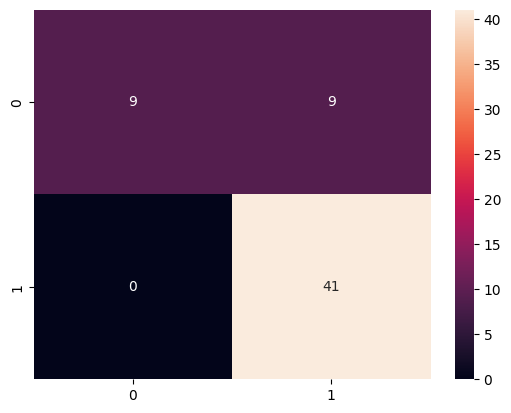

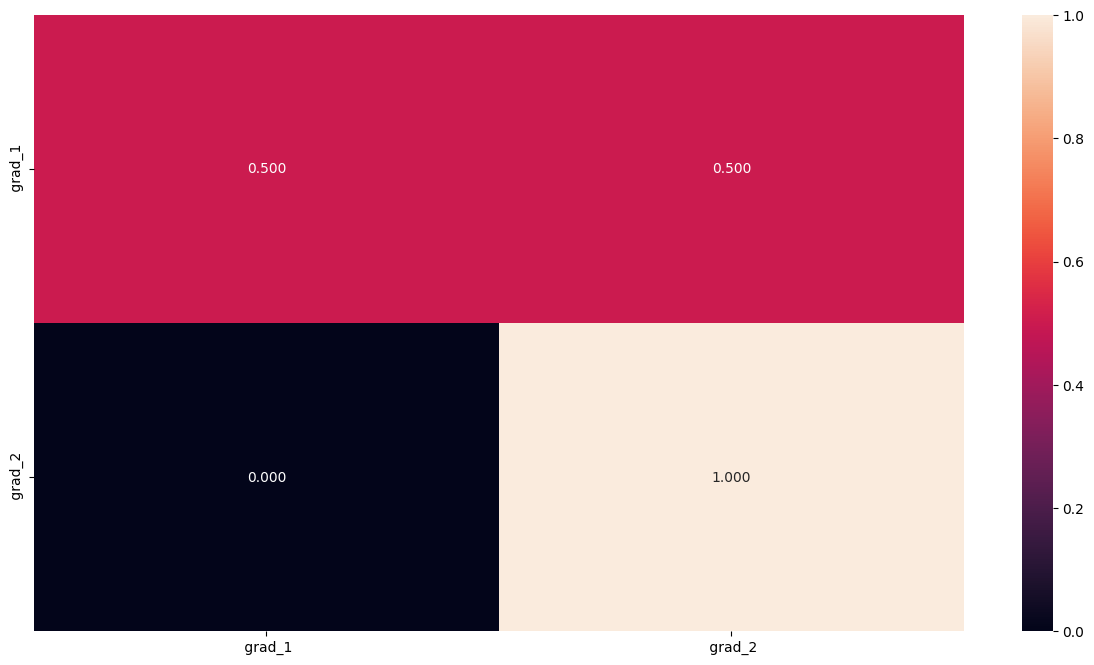

In [ ]:
labels = [' grad_1', ' grad_2']

print('Confusion Matrix')
print(confusion_matrix(y_test_root, y_pred))
print('Classification Report')
print(classification_report(y_test_root, y_pred, digits=3))

cf_matrix=confusion_matrix(y_test_root, y_pred)
sns.heatmap(cf_matrix, annot=True)
cnf_matrix_norm = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
print(df_cm.describe().T)
plt.figure(figsize=(15, 8))
sns.heatmap(df_cm, annot=True, fmt='.3f')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Create a Logistic Regression classifier object
logistic_regression = DecisionTreeClassifier(criterion='entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 5, random_state=42,splitter='random')


# Train the classifier on the full training data
logistic_regression.fit(X_train_final, y_train_root)

# Make predictions on the test data
y_pred = logistic_regression.predict(X_test_final)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test_root, y_pred)
print("DecisionTreeClassifier  Accuracy:", accuracy)


from sklearn.metrics import recall_score, precision_score

# Calculate recall
recall = recall_score(y_test_root, y_pred)

# Calculate precision
precision = precision_score(y_test_root, y_pred)

print("Recall:", recall)
print("Precision:", precision)

from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
confusion = confusion_matrix(y_test_root, y_pred)

print("Confusion Matrix:")
print(confusion)


DecisionTreeClassifier  Accuracy: 0.8813559322033898
Recall: 0.9512195121951219
Precision: 0.8863636363636364
Confusion Matrix:
[[13  5]
 [ 2 39]]


Confusion Matrix
[[13  5]
 [ 2 39]]
Classification Report
              precision    recall  f1-score   support

           0      0.867     0.722     0.788        18
           1      0.886     0.951     0.918        41

    accuracy                          0.881        59
   macro avg      0.877     0.837     0.853        59
weighted avg      0.880     0.881     0.878        59

         count      mean       std       min       25%       50%       75%  \
 grad_1    2.0  0.385501  0.476195  0.048780  0.217141  0.385501  0.553862   
 grad_2    2.0  0.614499  0.476195  0.277778  0.446138  0.614499  0.782859   

              max  
 grad_1  0.722222  
 grad_2  0.951220  


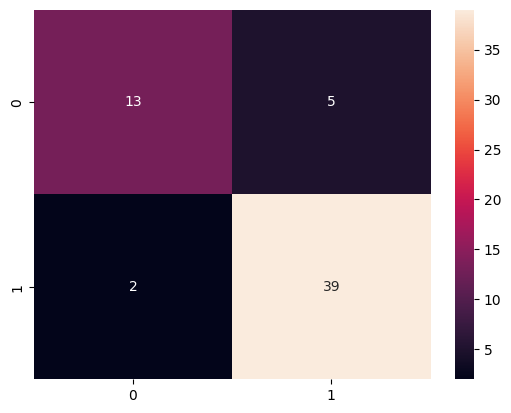

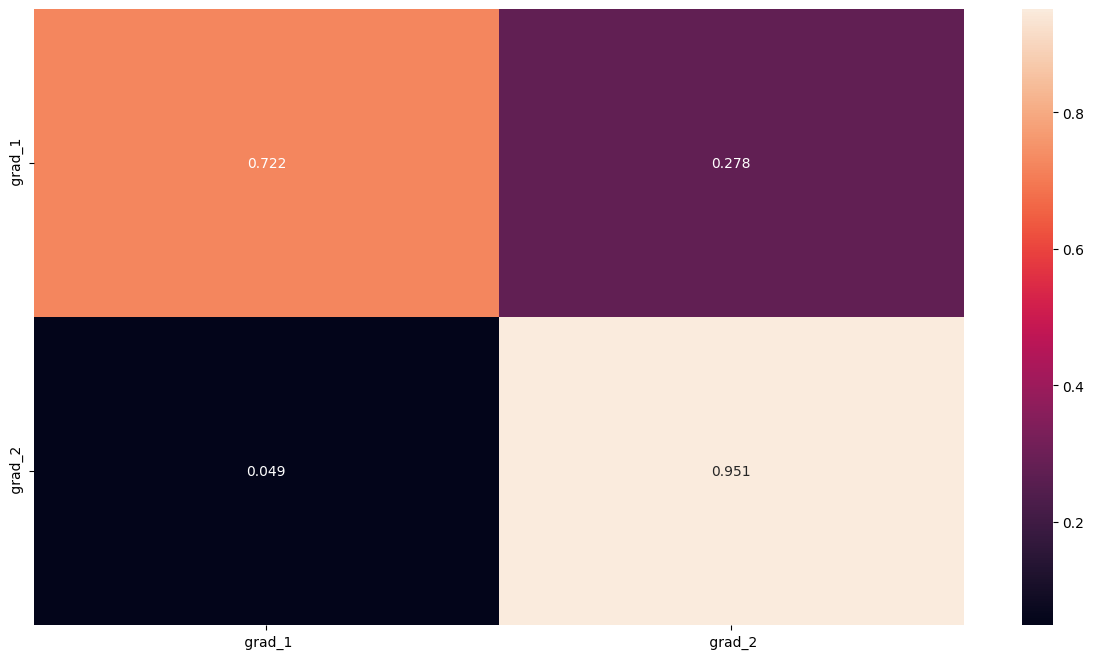

In [ ]:
labels = [' grad_1', ' grad_2']

print('Confusion Matrix')
print(confusion_matrix(y_test_root, y_pred))
print('Classification Report')
print(classification_report(y_test_root, y_pred, digits=3))

cf_matrix=confusion_matrix(y_test_root, y_pred)
sns.heatmap(cf_matrix, annot=True)
cnf_matrix_norm = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
print(df_cm.describe().T)
plt.figure(figsize=(15, 8))
sns.heatmap(df_cm, annot=True, fmt='.3f')
plt.show()